# Explore here

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
df.shape

(20640, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [48]:
df.drop(['HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal'], axis=1, inplace=True)
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [49]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_norm = scaler.fit_transform(train_df)
test_norm = scaler.transform(test_df)

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_norm)

KMeans(n_clusters=6, random_state=42)

In [52]:
train_df['cluster'] = kmeans.labels_
train_df

,MedInc,Latitude,Longitude,cluster
4602,1.2012,34.05,-118.27,1
6978,3.8275,33.97,-118.03,4
16415,3.1719,37.88,-121.26,5
2549,1.9688,40.79,-124.17,5
11025,4.1339,33.79,-117.82,4
...,...,...,...,...
11284,6.3700,33.78,-117.96,4
11964,3.0500,34.02,-117.43,1
5390,2.9344,34.03,-118.38,1
860,5.7192,37.58,-121.96,2


Text(0.5, 1.0, 'Clusters en datos de entrenamiento')

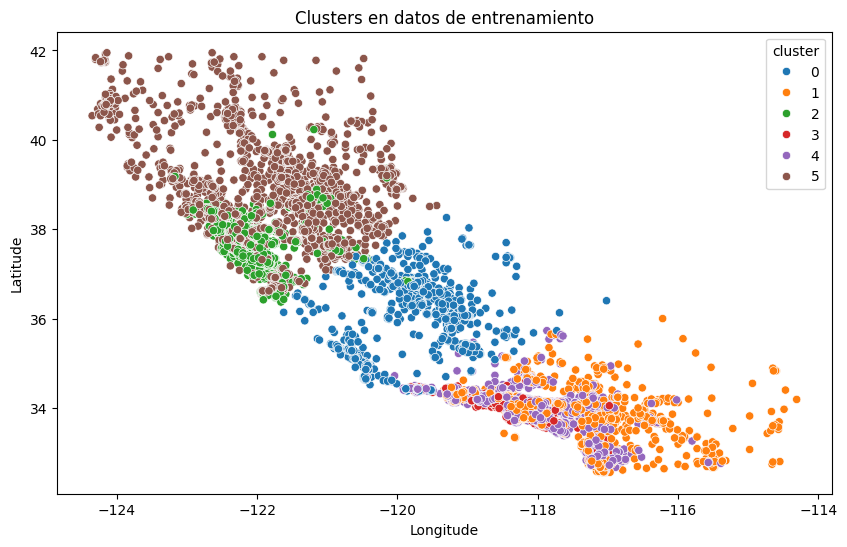

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='Longitude', y='Latitude', hue='cluster', palette='tab10', legend='full')
plt.title('Clusters en datos de entrenamiento')

En el grafico podemos observar la distribucion de los clusters, de los cuales 4 si no 5 estan aparentemente bien definidos  

In [54]:
test_df['cluster'] = kmeans.predict(test_norm)
test_df

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,0
3024,2.5313,35.14,-119.46,0
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,4
9814,3.7250,36.62,-121.93,5
...,...,...,...,...
19053,3.2937,38.16,-121.69,5
9444,2.6620,37.57,-119.82,0
20266,3.0870,34.21,-119.18,1
13522,6.1426,34.23,-117.41,4


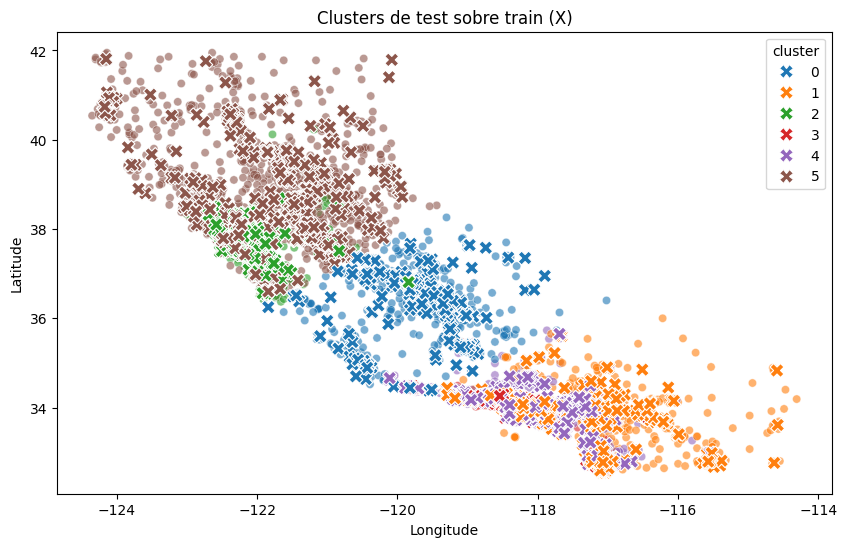

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='Longitude', y='Latitude', hue='cluster', palette='tab10', legend=False, alpha=0.6)
sns.scatterplot(data=test_df, x='Longitude', y='Latitude', hue='cluster', palette='tab10', legend='brief', marker='X', s=100)
plt.title('Clusters de test sobre train (X)')
plt.show()

En este grafico vemos que la distribucion de test coincide con la distribucion de train, por lo que podemos concluir que los grupos son buenos y que el modelo funciona.

In [56]:
X_train = train_df.drop(columns='cluster')
y_train = train_df['cluster']

X_test = test_df.drop(columns='cluster')
y_test = test_df['cluster']

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = model.predict(X_test)

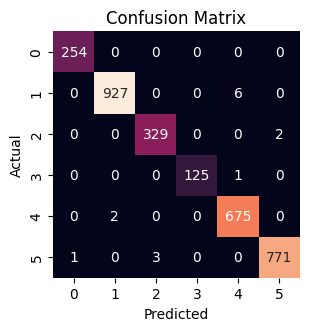


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      0.99      1.00       933
           2       0.99      0.99      0.99       331
           3       1.00      0.99      1.00       126
           4       0.99      1.00      0.99       677
           5       1.00      0.99      1.00       775

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096



In [61]:
from sklearn.metrics import classification_report, confusion_matrix

house_cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(house_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))